In [1]:
import cv2
import matplotlib.pyplot as plt

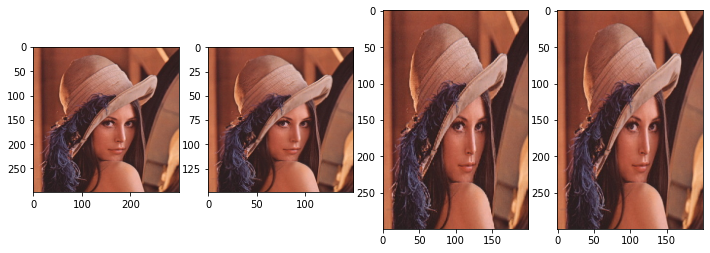

In [4]:
img = cv2.imread('../data/lena.jpg', 1)[..., ::-1]

h, w = img.shape[:2]

dst_size = (int(w / 2), int(h / 2))  # 缩放目标尺寸，宽高均为原来1/2 ,除完了是浮点数，所以要int
resized_min = cv2.resize(img, dst_size)  # 执行缩放

dst_size = (200, 300)  # 缩放目标尺寸，宽200，高300
method = cv2.INTER_NEAREST  # 最邻近插值
resized_INTER_NEAREST = cv2.resize(img, dst_size, interpolation=method)  # 执行缩放

dst_size = (200, 300)  # 缩放目标尺寸，宽200，高300
method = cv2.INTER_LINEAR  # 双线性插值
resized_INTER_LINEAR = cv2.resize(img, dst_size, interpolation=method)  # 执行缩放

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(resized_min)
axes[2].imshow(resized_INTER_NEAREST)
axes[3].imshow(resized_INTER_LINEAR)
plt.show()

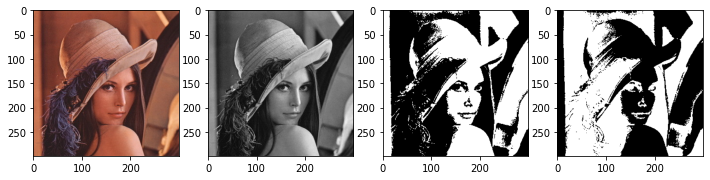

In [5]:
img = cv2.imread('../data/lena.jpg', 1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

t, res = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
t, res2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))
axes[2].imshow(res, cmap=plt.get_cmap('gray'))
axes[3].imshow(res2, cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
#查找并绘制轮廓

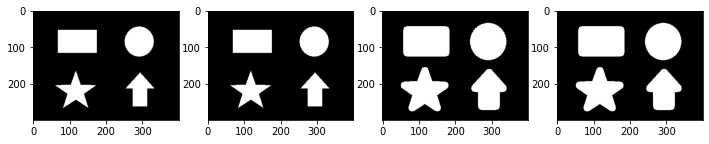

In [130]:
img = cv2.imread('../data/3.png', 1)[..., ::-1]

#轮廓转二值化
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
t, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#查找轮廓
cnts, hie = cv2.findContours(binary,
                             mode=cv2.RETR_EXTERNAL,  #只检测外轮廓
                             method=cv2.CHAIN_APPROX_NONE)  #存储所有的轮廓点

#绘制轮廓
img_cnt = cv2.drawContours(binary, cnts,
                           -1,  # 绘制全部轮廓
                           (255, 255, 255),  # 轮廓颜色
                           20)  # 轮廓粗细

fig, axes = plt.subplots(1, 4, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))
axes[2].imshow(binary, cmap=plt.get_cmap('gray'))  # 因为使用了cv2.drawContours(binary.所以修改了原图
axes[3].imshow(img_cnt, cmap=plt.get_cmap('gray'))
plt.show()

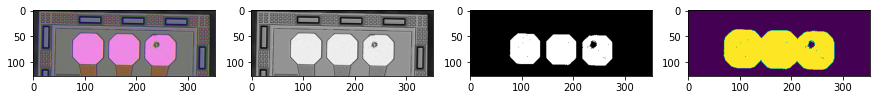

In [66]:
#练习
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
img = cv2.imread('../data/CPU3.png', 1)[..., ::-1]
axes[0].imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))

t, binary = cv2.threshold(gray, 169, 255, cv2.THRESH_BINARY)
axes[2].imshow(binary, cmap=plt.get_cmap('gray'))

cnts, hie = cv2.findContours(binary,
                             mode=cv2.RETR_EXTERNAL,  #只检测外轮廓
                             method=cv2.CHAIN_APPROX_NONE)  #存储所有的轮廓点

#print(type(cnts))
#print(len(cnts))
#print(cnts[0])
#for i in range(len(cnts)):
#    print(cnts[i].shape)
#print(hie)

#绘制轮廓
img_cnt = cv2.drawContours(binary, cnts,
                           -1,  # 绘制全部轮廓
                           (255, 255, 0),  # 轮廓颜色：红色
                           15)  # 轮廓粗细

axes[3].imshow(img_cnt)
plt.show()

In [68]:
import numpy as np

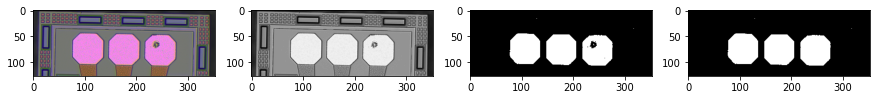

In [76]:
#练习改进
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
img = cv2.imread('../data/CPU3.png', 1)[..., ::-1]
axes[0].imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))

t, binary = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
axes[2].imshow(binary, cmap=plt.get_cmap('gray'))

#对二值化进行闭运算,不处理，会影响瑕疵
#kernal = np.ones((3, 3), np.uint8)
#close = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernal, iterations=2)
#axes[4].imshow(close)

cnts, hie = cv2.findContours(binary,
                             mode=cv2.RETR_EXTERNAL,  #只检测外轮廓
                             method=cv2.CHAIN_APPROX_NONE)  #存储所有的轮廓点

#print(type(cnts))
#print(len(cnts))
#print(cnts[0])
#for i in range(len(cnts)):
#    print(cnts[i].shape)
#print(hie)

#绘制轮廓
img_cnt = cv2.drawContours(binary, cnts,
                           -1,  # 绘制全部轮廓
                           (255, 255, 0),  # 轮廓颜色：红色
                           -1)  # 轮廓粗细 -1表示实心化填充

axes[3].imshow(img_cnt, cmap='gray')
plt.show()

In [77]:
#拟合轮廓矩形包围框

左上角定点：(118,56),宽度和高度(174,74)


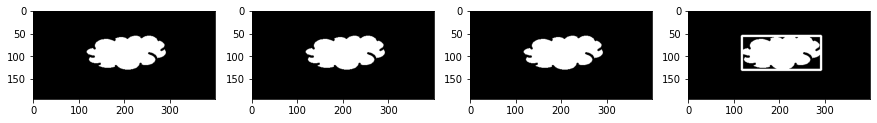

In [105]:
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
img = cv2.imread('../data/cloud.png', 1)[..., ::-1]
axes[0].imshow(img)

#灰度化
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))

#二值化
t, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
axes[2].imshow(binary, cmap=plt.get_cmap('gray'))

#查找轮廓
cnts, hie = cv2.findContours(binary,
                             mode=cv2.RETR_EXTERNAL,  #只检测外轮廓
                             method=cv2.CHAIN_APPROX_NONE)  #存储所有的轮廓点

x, y, w, h = cv2.boundingRect(cnts[0])  #实际上cnts只有一个轮廓，因为原图就一个图像

print('左上角定点：({},{}),宽度和高度({},{})'.format(x, y, w, h))
#根据矩形参数，确定四个顶点
poins = np.array([[[x, y]],
                  [[x, y + h]],
                  [[x + w, y + h]],
                  [[x + w, y]]])

#绘制矩形
img_cnt = cv2.drawContours(binary, [poins], -1, (255, 255, 255), 3)
axes[3].imshow(img_cnt, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# 圆形包围框

圆心和半径：((204.5, 91.5),86.53621673583984)


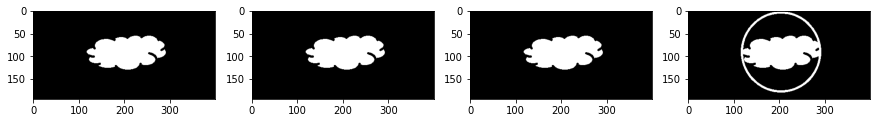

In [104]:
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
img = cv2.imread('../data/cloud.png', 1)[..., ::-1]
axes[0].imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))

t, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
axes[2].imshow(binary, cmap=plt.get_cmap('gray'))

#查找轮廓
cnts, hie = cv2.findContours(binary,
                             mode=cv2.RETR_EXTERNAL,  #只检测外轮廓
                             method=cv2.CHAIN_APPROX_NONE)  #存储所有的轮廓点

center, radius = cv2.minEnclosingCircle(cnts[0])

print('圆心和半径：({},{})'.format(center, radius))
#圆心和半径必须是整数
center = (int(center[0]), int(center[1]))
radius = int(radius)

img_cnt = cv2.circle(binary, center, radius, (255, 255, 255), 3)
axes[3].imshow(img_cnt, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#椭圆拟合

ellipse: ((204.24952697753906, 91.23741149902344), (69.94644165039062, 162.95944213867188), 84.70285034179688)


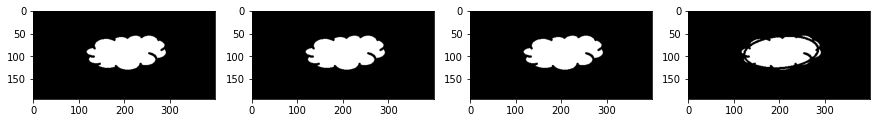

In [110]:
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
img = cv2.imread('../data/cloud.png', 1)[..., ::-1]
axes[0].imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))

t, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
axes[2].imshow(binary, cmap=plt.get_cmap('gray'))

#查找轮廓
cnts, hie = cv2.findContours(binary,
                             mode=cv2.RETR_EXTERNAL,  #只检测外轮廓
                             method=cv2.CHAIN_APPROX_NONE)  #存储所有的轮廓点

ellipse = cv2.fitEllipse(cnts[0])
#ellipse为RotatedRect类型的值，包含外接矩形的质心、宽、高、旋转角度等参数信息，这些信息正好与椭圆的中心点、轴长度、旋转角度等信息吻合

print("ellipse:", ellipse)
# 绘制椭圆
img_cnt = cv2.ellipse(binary, ellipse, (0, 0, 0), 4)
axes[3].imshow(img_cnt, cmap=plt.get_cmap('gray'))
plt.show()

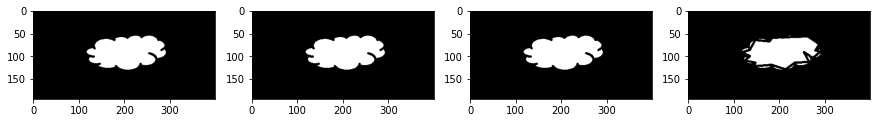

In [118]:
fig, axes = plt.subplots(1, 4, figsize=(15, 15))
img = cv2.imread('../data/cloud.png', 1)[..., ::-1]
axes[0].imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
axes[1].imshow(gray, cmap=plt.get_cmap('gray'))

t, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
axes[2].imshow(binary, cmap=plt.get_cmap('gray'))

#查找轮廓
cnts, hie = cv2.findContours(binary,
                             mode=cv2.RETR_EXTERNAL,  #只检测外轮廓
                             method=cv2.CHAIN_APPROX_NONE)  #存储所有的轮廓点

epsilon = 0.01 * cv2.arcLength(cnts[0], True)  # 精度，根据周长计算True表示求封闭周长，0。01表示是0。01倍周长
poins = cv2.approxPolyDP(cnts[0], epsilon, True)  # 构造多边形True表示闭合

# 绘制椭圆
img_cnt = cv2.drawContours(binary, [poins], -1, (0, 0, 0), 4)  #-1表示轮廓集内所有轮廓都要画出来，是轮廓的索引
axes[3].imshow(img_cnt, cmap=plt.get_cmap('gray'))
plt.show()